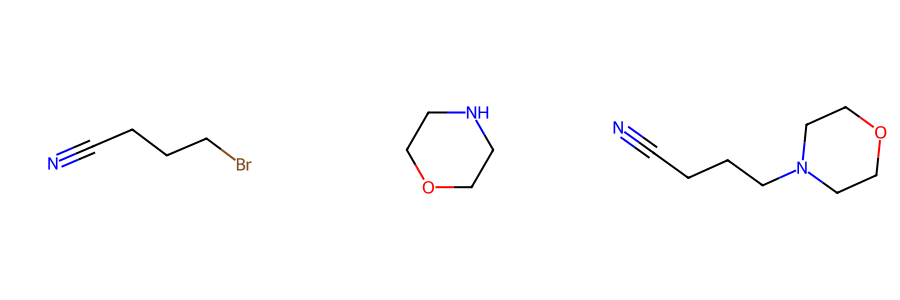

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

# Define reactants and product
reactant1 = Chem.MolFromSmiles("N#CCCCBr")
reactant2 = Chem.MolFromSmiles("C1COCCN1")
product = Chem.MolFromSmiles("N#CCCCN1CCOCC1")

# Draw the reaction interactively
img = Draw.MolsToGridImage([reactant1, reactant2, product], 
                           molsPerRow=3, subImgSize=(300, 300), 
                           legends=["", "", ""], 
                           useSVG=True)

# Display the image interactively
display(img)

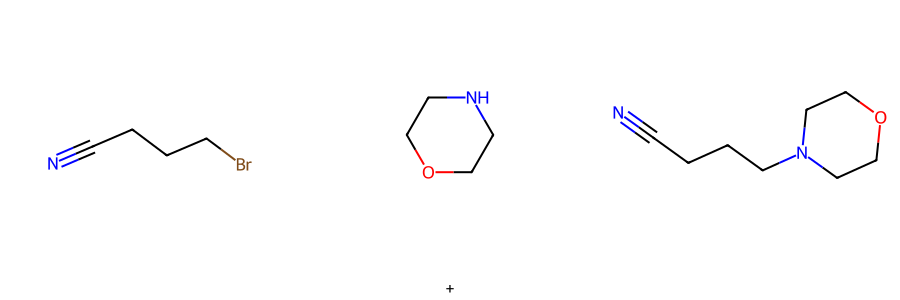

In [5]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

# Define reactants and product
reactant1 = Chem.MolFromSmiles("N#CCCCBr")
reactant2 = Chem.MolFromSmiles("C1COCCN1")
product = Chem.MolFromSmiles("N#CCCCN1CCOCC1")

# Draw the reaction interactively with '+' and '->'
img = Draw.MolsToGridImage([reactant1, reactant2, product], 
                           molsPerRow=3, subImgSize=(300, 300), 
                           legends=["", "+", "→"], 
                           useSVG=True)

# Display the image interactively
display(img)

(6.538274500206704, 3.0000000000000004, 9.122591296447155)


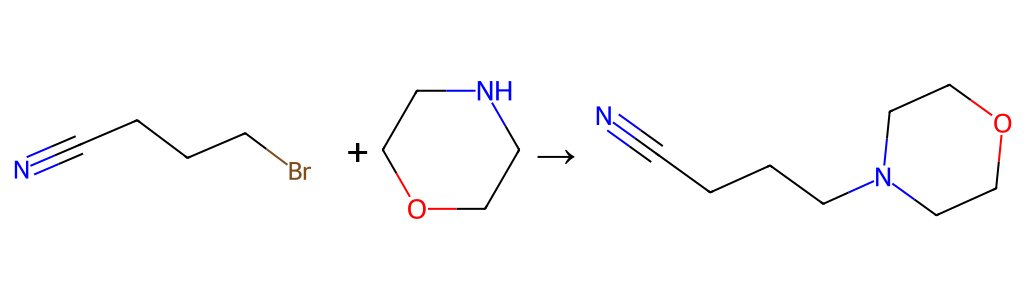

In [41]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

def get_scale(mol, base_size):
    # Compute the bounds of the molecule
    conf = mol.GetConformer()
    min_x = min([conf.GetAtomPosition(i).x for i in range(mol.GetNumAtoms())])
    max_x = max([conf.GetAtomPosition(i).x for i in range(mol.GetNumAtoms())])
    
    # Compute the scale factor based on the bounds
    scale = (max_x - min_x)
    return scale

# reactant1 = Chem.MolFromSmiles("Nc1cc(Cl)ccc1[N+](=O)[O-]")
# reactant2 = Chem.MolFromSmiles("C[O-]")
# product = Chem.MolFromSmiles("COc1ccc([N+](=O)[O-])c(N)c1")

# Define reactants and product
reactant1 = Chem.MolFromSmiles("N#CCCCBr")
reactant2 = Chem.MolFromSmiles("C1COCCN1")
product = Chem.MolFromSmiles("N#CCCCN1CCOCC1")

# Compute 2D coordinates for the molecules
rdDepictor.Compute2DCoords(reactant1)
rdDepictor.Compute2DCoords(reactant2)
rdDepictor.Compute2DCoords(product)

# Determine scale factor
base_size = 300.0  # this can be adjusted based on desired image size
scales = get_scale(reactant1, base_size), get_scale(reactant2, base_size), get_scale(product, base_size)
print(scales)
# Get individual images
img_reactant1 = Draw.MolToImage(reactant1, size=(int(50*scales[0]),300))
img_reactant2 = Draw.MolToImage(reactant2, size=(int(50*scales[1]),300))
img_product = Draw.MolToImage(product, size=(int(50*scales[2]),300))

# Create a composite image
width = img_reactant1.width + img_reactant2.width + img_product.width + 100
height = max(img_reactant1.height, img_reactant2.height, img_product.height)

composite = Image.new('RGB', (width, height), (255, 255, 255))
composite.paste(img_reactant1, (0, 0))
composite.paste(img_reactant2, (img_reactant1.width + 50, 0))
composite.paste(img_product, (img_reactant1.width + img_reactant2.width + 100, 0))

draw = ImageDraw.Draw(composite)
font = ImageFont.truetype("arial.ttf", 40)
draw.text((img_reactant1.width + 20, height//2 - 20), "+", font=font, fill=(0, 0, 0))
draw.text((img_reactant1.width + img_reactant2.width + 60, height//2 - 20), "→", font=font, fill=(0, 0, 0))

# Display the composite image interactively
display(composite)

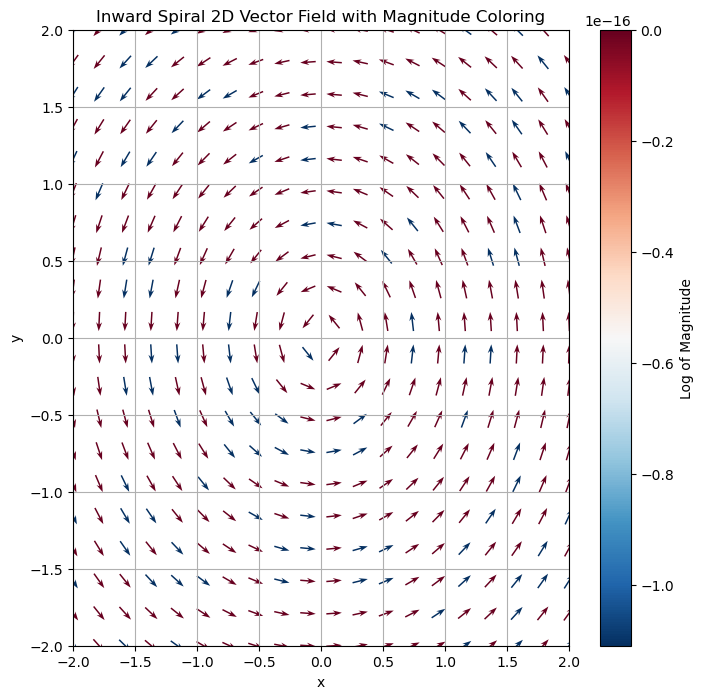

In [57]:
import numpy as np
import matplotlib.pyplot as plt
# Adjust the grid of points
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)

# Define the vector field components to create a spiraling effect
R = np.sqrt(X**2 + Y**2)  # Radial distance from the origin
U = -Y / R
V = X / R

# Compute the magnitude of the vectors
magnitude = np.sqrt(U**2 + V**2)

# Plot the vector field with colors representing magnitudes
plt.figure(figsize=(8, 8))
color = np.log(magnitude)  # Use log to enhance color differences
plt.quiver(X, Y, U, V, color, angles='xy', scale_units='xy', scale=8, pivot='middle', cmap='RdBu_r', headwidth=4, headlength=6)
plt.colorbar(label='Log of Magnitude')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Inward Spiral 2D Vector Field with Magnitude Coloring')
plt.grid()
plt.show()


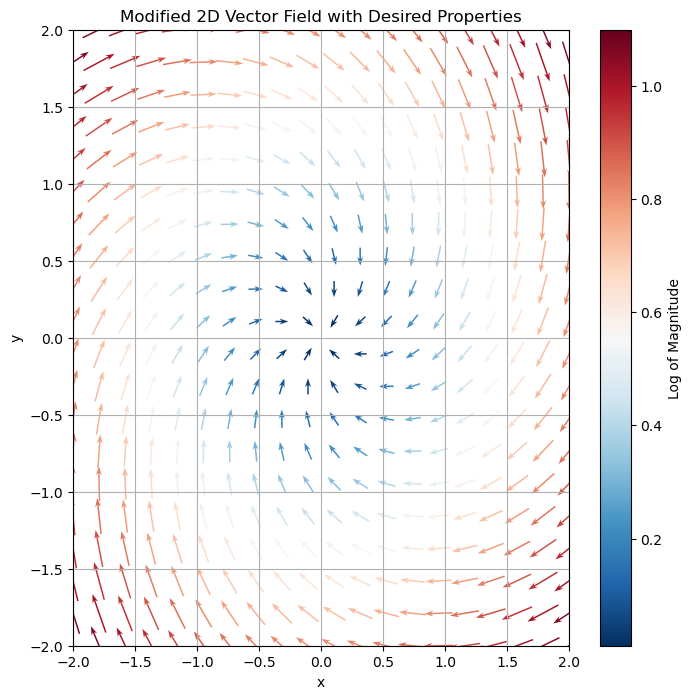

In [68]:
# Define the vector field components based on the given equations

# Calculate the orthogonal vector to the position vector
U_orthogonal = -Y
V_orthogonal = X

# Calculate the vector pointing towards the origin
U_inward = -X
V_inward = -Y

# Define the weighting function alpha
alpha = 1/R

# Compute the combined vector field
U_combined = -(U_orthogonal - alpha * U_inward)
V_combined = -(V_orthogonal - alpha * V_inward)

# Compute the magnitude of the combined vectors
magnitude_combined = np.sqrt(U_combined**2 + V_combined**2)

# Plot the combined vector field with colors representing magnitudes
plt.figure(figsize=(8, 8))
# color_combined = magnitude_combined  # Use log to enhance color differences
color_combined = np.log(magnitude_combined)  # Use log to enhance color differences
plt.quiver(X, Y, U_combined, V_combined, color_combined, angles='xy', scale_units='xy', scale=10, pivot='middle', cmap='RdBu_r', headwidth=4, headlength=6)
plt.colorbar(label='Log of Magnitude')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Modified 2D Vector Field with Desired Properties')
plt.grid()
plt.show()


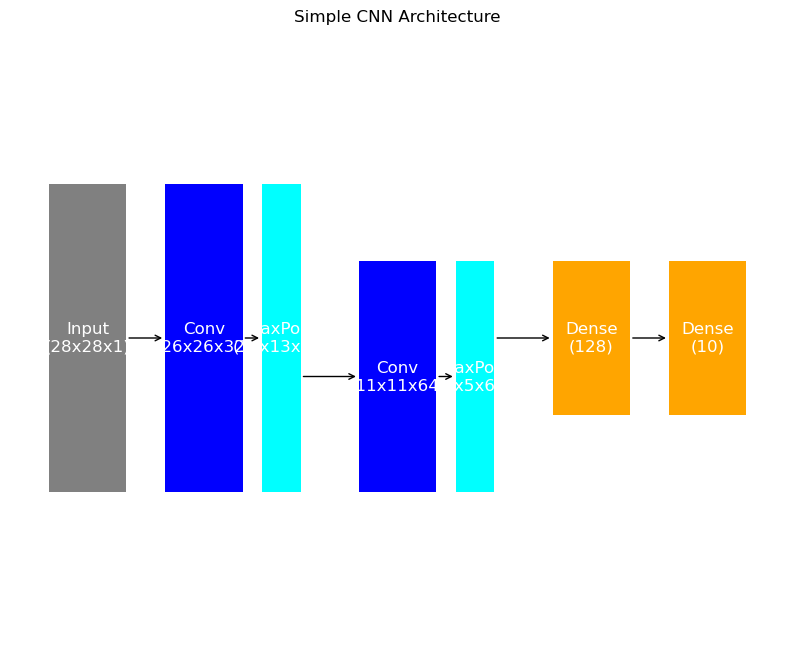

In [69]:
import matplotlib.patches as patches

def draw_rect(ax, pos, size, text, color='blue'):
    """Draw rectangle with label inside"""
    ax.add_patch(patches.Rectangle(pos, size[0], size[1], fc=color))
    ax.text(pos[0] + size[0]/2, pos[1] + size[1]/2, text, ha='center', va='center', fontsize=12, color='white')

fig, ax = plt.subplots(figsize=(10, 8))

# Input Layer
draw_rect(ax, (0, 6), (2, 2), "Input\n(28x28x1)", color='gray')

# Convolutional Layer 1
draw_rect(ax, (3, 6), (2, 2), "Conv\n(26x26x32)", color='blue')
draw_rect(ax, (5.5, 6), (1, 2), "MaxPool\n(13x13x32)", color='cyan')

# Convolutional Layer 2
draw_rect(ax, (8, 6), (2, 1.5), "Conv\n(11x11x64)", color='blue')
draw_rect(ax, (10.5, 6), (1, 1.5), "MaxPool\n(5x5x64)", color='cyan')

# Fully Connected Layers
draw_rect(ax, (13, 6.5), (2, 1), "Dense\n(128)", color='orange')
draw_rect(ax, (16, 6.5), (2, 1), "Dense\n(10)", color='orange')

# Arrows
arrowprops = dict(facecolor='black', arrowstyle='->')
ax.annotate('', xy=(3, 7), xytext=(2, 7), arrowprops=arrowprops)
ax.annotate('', xy=(5.5, 7), xytext=(5, 7), arrowprops=arrowprops)
ax.annotate('', xy=(8, 6.75), xytext=(6.5, 6.75), arrowprops=arrowprops)
ax.annotate('', xy=(10.5, 6.75), xytext=(10, 6.75), arrowprops=arrowprops)
ax.annotate('', xy=(13, 7), xytext=(11.5, 7), arrowprops=arrowprops)
ax.annotate('', xy=(16, 7), xytext=(15, 7), arrowprops=arrowprops)

# Set plot limits and turn off axis
ax.set_xlim(-1, 19)
ax.set_ylim(5, 9)
ax.axis('off')

plt.title("Simple CNN Architecture")
plt.show()
